In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv("C:\\Users\\varun\\OneDrive\\Desktop\\Fall Sem\\Smart Internz AI&ML\\10_LSTM\\Google_Stock_Price_Train (1).csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


# Data Preprocessing

In [3]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


# Feature selection for timeseries prediction

In [5]:
 #Only one column should be used for LSTM model

train = df.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

<Axes: >

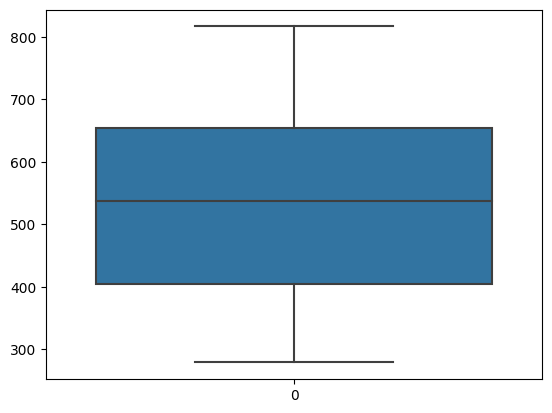

In [6]:
import seaborn as sns
sns.boxplot(train)

In [7]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train=sc.fit_transform(train)
train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:

"""

Data = 1,2,3,4,5,6,7,8,9,10    t(timestamp)=3

Input for LSTM Model
C1  C2  C3  O/P
1   2   3    4
2   3   4    5
3   4   5    6
4   5   6    7
5   6   7    8
6   7   8    9
7   8   9    10

Output for LSTM

8   9   10   11

"""

'\n\nData = 1,2,3,4,5,6,7,8,9,10    t(timestamp)=3\n\nInput for LSTM Model\nC1  C2  C3  O/P\n1   2   3    4\n2   3   4    5\n3   4   5    6\n4   5   6    7\n5   6   7    8\n6   7   8    9\n7   8   9    10\n\nOutput for LSTM\n\n8   9   10   11\n\n'

In [9]:
len(train)

1258

In [10]:
# Splitting the data with 60 as time step similar to frame length

x_train = []
y_train = []

for i in range(60,1258):  # t=60
  x_train.append(train[i-60:i,0])  # [:,:]
  y_train.append(train[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [11]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [12]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

# Creating a channel coz lstm requires the standard format

In [13]:
# (1198, 60) to (1198, 60, 1)
x_train = x_train.reshape((1198, 60, 1))
x_train.shape

(1198, 60, 1)

# Model Definition

In [32]:
from tensorflow.keras.layers import LeakyReLU

# Building LSTM model

model = Sequential()
model.add(LSTM(50, input_shape=(60,1),return_sequences=True,activation='relu'))
model.add(LSTM(50,return_sequences=True,activation='LeakyReLU'))
model.add(LSTM(50,return_sequences=True,activation='linear'))
model.add(Dense(1))

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dense_5 (Dense)             (None, 60, 1)             51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',loss='mse',metrics='accuracy')

In [35]:
model.fit(x_train,y_train,batch_size=16,epochs=30,validation_split=0.2)

Epoch 1/30
60/60 [==============================] - 18s 145ms/step - loss: 0.0739 - accuracy: 0.0010 - val_loss: 0.1672 - val_accuracy: 0.0032
Epoch 2/30
60/60 [==============================] - 8s 137ms/step - loss: 0.0531 - accuracy: 0.0010 - val_loss: 0.1654 - val_accuracy: 0.0034
Epoch 3/30
60/60 [==============================] - 8s 135ms/step - loss: 0.0526 - accuracy: 0.0010 - val_loss: 0.2011 - val_accuracy: 0.0000e+00
Epoch 4/30
60/60 [==============================] - 7s 117ms/step - loss: 0.0514 - accuracy: 0.0010 - val_loss: 0.1962 - val_accuracy: 0.0000e+00
Epoch 5/30
60/60 [==============================] - 4s 69ms/step - loss: 0.0504 - accuracy: 0.0010 - val_loss: 0.1665 - val_accuracy: 0.0000e+00
Epoch 6/30
60/60 [==============================] - 3s 58ms/step - loss: 0.0510 - accuracy: 0.0010 - val_loss: 0.1924 - val_accuracy: 0.0000e+00
Epoch 7/30
60/60 [==============================] - 4s 59ms/step - loss: 0.0499 - accuracy: 0.0010 - val_loss: 0.2182 - val_accuracy:

In [ ]:
model.predict(x_train[0])

2/2 [==============================] - 1s 7ms/step


array([[[0.40584198]],

       [[0.4060286 ]],

       [[0.40598392]],

       [[0.40593773]],

       [[0.40574253]],

       [[0.40548462]],

       [[0.4053886 ]],

       [[0.40550718]],

       [[0.40543085]],

       [[0.40551892]],

       [[0.4054364 ]],

       [[0.40565774]],

       [[0.40488228]],

       [[0.40481308]],

       [[0.404818  ]],

       [[0.40468317]],

       [[0.40459844]],

       [[0.40458003]],

       [[0.40469146]],

       [[0.40476704]],

       [[0.40479684]],

       [[0.4047956 ]],

       [[0.40488443]],

       [[0.40495092]],

       [[0.40513718]],

       [[0.40515995]],

       [[0.40521204]],

       [[0.40514857]],

       [[0.40518865]],

       [[0.40520468]],

       [[0.40522596]],

       [[0.40507063]],

       [[0.4051039 ]],

       [[0.40508696]],

       [[0.40521112]],

       [[0.405135  ]],

       [[0.40514025]],

       [[0.40512857]],

       [[0.40518096]],

       [[0.40531293]],

       [[0.40536943]],

       [[0.40536